# Logistic Regression

### Step 1 - Data preprocessing

In [9]:
#importing libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [10]:
dataset = pd.read_csv('datasets/Social_Network_Ads.csv')
orig_dataset=dataset #saving the original dataset
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
# Removing User ID column
dataset = dataset.drop(columns='User ID')

In [18]:
# Creating dummy variables
dataset = pd.get_dummies(dataset,drop_first=True)
dataset.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [19]:
dataset.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [20]:
#Spliting
from sklearn.model_selection import train_test_split
y_col=['Purchased']
y=dataset[y_col]
X=dataset.drop(columns=y_col)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


### Step 2 - Feature scaling

In [12]:
from sklearn import preprocessing
std_cols = ['Age', 'EstimatedSalary']
std_scal=preprocessing.StandardScaler()
X_train.loc[:,std_cols]=std_scal.fit_transform(X_train[std_cols])
X_test.loc[:,std_cols]=std_scal.fit_transform(X_test[std_cols])

### Step 3 - Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Diogo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### Step 4 - Predict

In [22]:
y_pred = model.predict(X_test)

### Step 5 - Evaluate Predictions

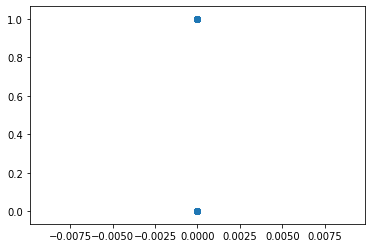

In [24]:
plt.scatter(y_pred,y_test)

In [25]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
model.score(X_test, y_test)

0.6